In [13]:
import os, math, import_ipynb, cv2, dlib, warnings, datetime, itertools, pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing import image

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard

from utils import *
warnings.filterwarnings('ignore')

In [2]:
os.chdir("/Users/kenyew/Documents/Git/AMLSassignment19_20/AMLS_19-20_Ken_Yew_Piong_SN16004444/")
os.getcwd()

'/Users/kenyew/Documents/Git/AMLSassignment19_20/AMLS_19-20_Ken_Yew_Piong_SN16004444'

In [ ]:
# sample_size = 5000
# landmark_features_celeba, gender_labels, smiling_labels = extract_features_labels_from_celeba(sample_size)

In [ ]:
# Saving the data set into pickle files
# pickle_out = open('landmark_features_celeba.pickle', 'wb')
# pickle.dump(landmark_features_celeba, pickle_out)
# pickle_out.close()

# pickle_out = open('gender_labels.pickle', 'wb')
# pickle.dump(gender_labels, pickle_out)
# pickle_out.close()

# pickle_out = open('smiling_labels.pickle', 'wb')
# pickle.dump(smiling_labels, pickle_out)
# pickle_out.close()

# Re-opening our data set
pickle_in = open('landmark_features_celeba.pickle', 'rb')
landmark_features_celeba = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open('gender_labels.pickle', 'rb')
gender_labels = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open('smiling_labels.pickle', 'rb')
smiling_labels = pickle.load(pickle_in)
pickle_in.close()

## Task A1 - Gender Recognition from celeba Dataset

In [ ]:
"""
# Task A1
model_A1 = A1(args...)                 # Build model object.
acc_A1_train = model_A1.train(args...) # Train model based on the training set (you should fine-tune your model based on validation set.)
acc_A1_test = model_A1.test(args...)   # Test model based on the test set.
Clean up memory/GPU etc...             # Some code to free memory if necessary.
"""
split_percentage = 10
feature_type = 'landmarks'
cv_folds = 5

X_all, X_train, X_test, y_all, y_train, y_test = get_split_data(landmark_features_celeba, gender_labels, split_percentage, feature_type)
model_A1, acc_A1_train, acc_A1_test, cm_A1 = build_svm_gridcv(X_train, X_test, y_train, y_test, cv_folds)

In [ ]:
task_A1_plot = plot_learning_curve(model_A1, 'Task A1 Learning Curve - SVM', X_train, y_train, ylim=None, cv=5,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5))

In [ ]:
plot_confusion_matrix(cm_A1, target_names = ['male', 'female'], title = 'Gender Confusion Matrix', cmap=plt.cm.Blues, normalize=False)

## Task A2 - Smiling Recognition from celeba Dataset

In [ ]:
"""
# Task A2
model_A2 = A2(args...)
acc_A2_train = model_A2.train(args...)
acc_A2_test = model_A2.test(args...)
Clean up memory/GPU etc...
"""
split_percentage = 80
feature_type = 'landmarks'
cv_folds = 5

X_all, X_train, X_test, y_all, y_train, y_test = get_split_data(landmark_features_celeba, smiling_labels, split_percentage, feature_type)
model_A2, acc_A2_train, acc_A2_test, cm_A2 = build_svm_gridcv(X_train, X_test, y_train, y_test, cv_folds)

In [ ]:
task_A2_plot = plot_learning_curve(model_A2, 'Task A2 Learning Curve - SVM', X_train, y_train, ylim=None, cv=5,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5))

In [ ]:
plot_confusion_matrix(cm_A2, target_names = ['no smile', 'smile'], title = 'Smile Confusion Matrix', cmap=plt.cm.Blues, normalize=False)

In [22]:
feature_type = 'rgb'
sample_size = 4000
img_features_cartoon_set, eye_color_labels, face_shape_labels = extract_features_labels_from_cartoon_set(feature_type, sample_size)

In [23]:
# Saving the data set into pickle files
# pickle_out = open('img_features_cartoon_set_landmarks.pickle', 'wb')
# pickle.dump(img_features_cartoon_set, pickle_out)
# pickle_out.close()

# pickle_out = open('img_features_cartoon_set_rgb.pickle', 'wb')
# pickle.dump(img_features_cartoon_set, pickle_out)
# pickle_out.close()

# pickle_out = open('eye_color_labels.pickle', 'wb')
# pickle.dump(eye_color_labels, pickle_out)
# pickle_out.close()

# pickle_out = open('face_shape_labels.pickle', 'wb')
# pickle.dump(face_shape_labels, pickle_out)
# pickle_out.close()

# # # Re-opening our data set
# pickle_in = open('img_features_cartoon_set_rgb.pickle', 'rb')
# img_features_cartoon_set = pickle.load(pickle_in)
# pickle_in.close()

# pickle_in = open('eye_color_labels.pickle', 'rb')
# eye_color_labels = pickle.load(pickle_in)
# pickle_in.close()

# pickle_in = open('face_shape_labels.pickle', 'rb')
# face_shape_labels = pickle.load(pickle_in)
# pickle_in.close()

## Task B1 - Eye Colour Recognition from cartoon Dataset

In [ ]:
"""
# Task B1
model_B1 = B1(args...)
acc_B1_train = model_B1.train(args...)
acc_B1_test = model_B1.test(args...)
Clean up memory/GPU etc...
"""
split_percentage = 80
feature_type = 'rgb'
cv_folds = 5

X_all, X_train, X_test, y_all, y_train, y_test = get_split_data(img_features_cartoon_set, eye_color_labels, split_percentage, feature_type)
model_B1, acc_B1_train, acc_B1_test, cm_B1 = build_svm_gridcv(X_train, X_test, y_train, y_test, cv_folds)

In [ ]:
task_B1_plot = plot_learning_curve(model_B1, 'Task B1 Learning Curve - SVM', X_train, y_train, ylim=None, cv=5,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5))

In [ ]:
plot_confusion_matrix(cm_B1, target_names = ['0', '1', '2', '3', '4'], title = 'Eye Colour Confusion Matrix', cmap=plt.cm.Blues, normalize=False)

## Task B2 - Face Shape Recognition from cartoon Dataset

In [18]:
"""
# Task B2
model_B2 = B2(args...)
acc_B2_train = model_B2.train(args...)
acc_B2_test = model_B2.test(args...)
Clean up memory/GPU etc...
"""
split_percentage = 20
feature_type = 'landmarks'
cv_folds = 5

X_all, X_train, X_test, y_all, y_train, y_test = get_split_data(img_features_cartoon_set, face_shape_labels, split_percentage, feature_type)
model_B2, acc_B2_train, acc_B2_test, cm_B2 = build_svm_gridcv(X_train, X_test, y_train, y_test, cv_folds)

# Tuning hyper-parameters for precision

Best parameters set found on training dataset:

{'C': 0.5, 'kernel': 'poly'}

Grid scores on training dataset:

0.051 (+/-0.001) for {'C': 0.01, 'kernel': 'rbf'}
0.051 (+/-0.001) for {'C': 0.05, 'kernel': 'rbf'}
0.051 (+/-0.001) for {'C': 0.1, 'kernel': 'rbf'}
0.051 (+/-0.001) for {'C': 0.5, 'kernel': 'rbf'}
0.051 (+/-0.001) for {'C': 1, 'kernel': 'rbf'}
0.140 (+/-0.025) for {'C': 5, 'kernel': 'rbf'}
0.226 (+/-0.076) for {'C': 10, 'kernel': 'rbf'}
0.645 (+/-0.084) for {'C': 0.01, 'kernel': 'linear'}
0.606 (+/-0.114) for {'C': 0.05, 'kernel': 'linear'}
0.581 (+/-0.110) for {'C': 0.1, 'kernel': 'linear'}
0.524 (+/-0.129) for {'C': 0.5, 'kernel': 'linear'}
0.526 (+/-0.114) for {'C': 1, 'kernel': 'linear'}
0.534 (+/-0.105) for {'C': 5, 'kernel': 'linear'}
0.534 (+/-0.105) for {'C': 10, 'kernel': 'linear'}
0.371 (+/-0.184) for {'C': 0.01, 'kernel': 'poly'}
0.559 (+/-0.134) for {'C': 0.05, 'kernel': 'poly'}
0.633 (+/-0.104) for {'C': 0.1, 'kernel': 'p

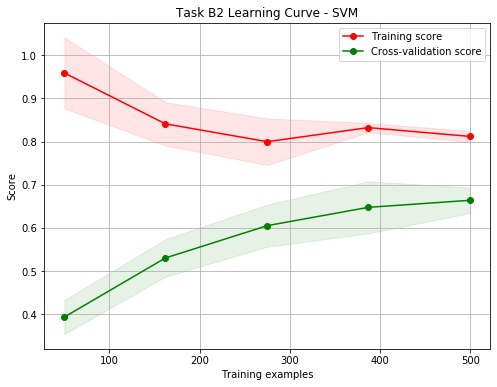

In [19]:
task_B2_plot = plot_learning_curve(model_B2, 'Task B2 Learning Curve - SVM', X_train, y_train, ylim=None, cv=5,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5))

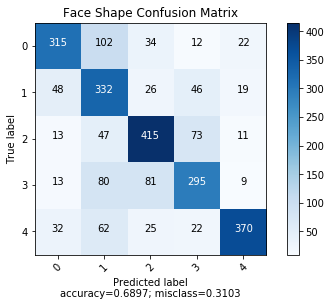

In [20]:
plot_confusion_matrix(cm_B2, target_names = ['0', '1', '2', '3', '4'], title = 'Face Shape Confusion Matrix', cmap=plt.cm.Blues, normalize=False)

## Results

In [ ]:
# Print out your results with following format:
# print('TA1:{},{};TA2:{},{};TB1:{},{};TB2:{},{};'.format(acc_A1_train, acc_A1_test,
#                                                         acc_A2_train, acc_A2_test,
#                                                         acc_B1_train, acc_B1_test,
#                                                         acc_B2_train, acc_B2_test))

## Results Archive

In [ ]:
"""
img_SVM performance: 
Accuracy: 0.8780092592592592
Training Error: 1.0
Testing Error: 0.8780092592592592
Validation Error: 0.9166666666666664

img_SVM_GridCV performance:
{'C': 0.1, 'kernel': 'linear'}
Accuracy: 0.8900462962962963
Training Error: 0.9729166666666667
Testing Error: 0.8900462962962963

img_SVM with scaled data performance: 
Accuracy: 0.8891203703703704
Training Error: 0.9770833333333333
Testing Error: 0.8891203703703704
Validation Error: 0.9172916666666666
"""

"""
SVM with GridCV on TASK A1
Best parameters set found on training dataset:

{'C': 0.01, 'kernel': 'linear'}

Grid scores on training dataset:

0.265 (+/-0.004) for {'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}
0.265 (+/-0.004) for {'C': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}
0.265 (+/-0.004) for {'C': 0.05, 'gamma': 0.001, 'kernel': 'rbf'}
0.265 (+/-0.004) for {'C': 0.05, 'gamma': 0.0001, 'kernel': 'rbf'}
0.731 (+/-0.178) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.366 (+/-0.406) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.826 (+/-0.073) for {'C': 0.5, 'gamma': 0.001, 'kernel': 'rbf'}
0.824 (+/-0.092) for {'C': 0.5, 'gamma': 0.0001, 'kernel': 'rbf'}
0.845 (+/-0.102) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.829 (+/-0.090) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.861 (+/-0.071) for {'C': 5, 'gamma': 0.001, 'kernel': 'rbf'}
0.877 (+/-0.107) for {'C': 5, 'gamma': 0.0001, 'kernel': 'rbf'}
0.855 (+/-0.060) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.878 (+/-0.101) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.909 (+/-0.073) for {'C': 0.01, 'kernel': 'linear'}
0.894 (+/-0.056) for {'C': 0.05, 'kernel': 'linear'}
0.900 (+/-0.050) for {'C': 0.1, 'kernel': 'linear'}
0.885 (+/-0.092) for {'C': 0.5, 'kernel': 'linear'}
0.879 (+/-0.091) for {'C': 1, 'kernel': 'linear'}
0.879 (+/-0.091) for {'C': 5, 'kernel': 'linear'}
0.879 (+/-0.091) for {'C': 10, 'kernel': 'linear'}
0.893 (+/-0.097) for {'C': 0.01, 'gamma': 0.001, 'kernel': 'poly'}
0.904 (+/-0.083) for {'C': 0.01, 'gamma': 0.0001, 'kernel': 'poly'}
0.893 (+/-0.097) for {'C': 0.05, 'gamma': 0.001, 'kernel': 'poly'}
0.896 (+/-0.098) for {'C': 0.05, 'gamma': 0.0001, 'kernel': 'poly'}
0.893 (+/-0.097) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'poly'}
0.894 (+/-0.096) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'poly'}
0.893 (+/-0.097) for {'C': 0.5, 'gamma': 0.001, 'kernel': 'poly'}
0.894 (+/-0.096) for {'C': 0.5, 'gamma': 0.0001, 'kernel': 'poly'}
0.893 (+/-0.097) for {'C': 1, 'gamma': 0.001, 'kernel': 'poly'}
0.894 (+/-0.096) for {'C': 1, 'gamma': 0.0001, 'kernel': 'poly'}
0.893 (+/-0.097) for {'C': 5, 'gamma': 0.001, 'kernel': 'poly'}
0.894 (+/-0.096) for {'C': 5, 'gamma': 0.0001, 'kernel': 'poly'}
0.893 (+/-0.097) for {'C': 10, 'gamma': 0.001, 'kernel': 'poly'}
0.894 (+/-0.096) for {'C': 10, 'gamma': 0.0001, 'kernel': 'poly'}

Detailed classification report:

The model is trained on the full training dataset.
The scores are computed on the full testing dataset.

              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      2176
         1.0       0.91      0.88      0.90      2144

    accuracy                           0.90      4320
   macro avg       0.90      0.90      0.90      4320
weighted avg       0.90      0.90      0.90      4320


Best estimator found: SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
Best parameters set found: {'C': 0.01, 'kernel': 'linear'}
SVM with GridCV on testing data - Accuracy Score: 0.898 (+/- 0.000)
SVM with GridCV on training data - Accuracy Score: 0.936 (+/- 0.000)
"""

"""
SVM with GridCV on TASK A2
# Tuning hyper-parameters for precision

Best parameters set found on training dataset:

{'C': 5, 'gamma': 0.0001, 'kernel': 'rbf'}

Grid scores on training dataset:

0.264 (+/-0.005) for {'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}
0.264 (+/-0.005) for {'C': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}
0.840 (+/-0.093) for {'C': 0.05, 'gamma': 0.001, 'kernel': 'rbf'}
0.837 (+/-0.123) for {'C': 0.05, 'gamma': 0.0001, 'kernel': 'rbf'}
0.863 (+/-0.055) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.866 (+/-0.088) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.860 (+/-0.062) for {'C': 0.5, 'gamma': 0.001, 'kernel': 'rbf'}
0.873 (+/-0.076) for {'C': 0.5, 'gamma': 0.0001, 'kernel': 'rbf'}
0.868 (+/-0.066) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.871 (+/-0.060) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.861 (+/-0.095) for {'C': 5, 'gamma': 0.001, 'kernel': 'rbf'}
0.881 (+/-0.055) for {'C': 5, 'gamma': 0.0001, 'kernel': 'rbf'}
0.850 (+/-0.083) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.881 (+/-0.073) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.878 (+/-0.079) for {'C': 0.01, 'kernel': 'linear'}
0.855 (+/-0.081) for {'C': 0.05, 'kernel': 'linear'}
0.850 (+/-0.095) for {'C': 0.1, 'kernel': 'linear'}
0.842 (+/-0.101) for {'C': 0.5, 'kernel': 'linear'}
0.846 (+/-0.119) for {'C': 1, 'kernel': 'linear'}
0.833 (+/-0.132) for {'C': 5, 'kernel': 'linear'}
0.833 (+/-0.132) for {'C': 10, 'kernel': 'linear'}
0.859 (+/-0.085) for {'C': 0.01, 'gamma': 0.001, 'kernel': 'poly'}
0.860 (+/-0.074) for {'C': 0.01, 'gamma': 0.0001, 'kernel': 'poly'}
0.859 (+/-0.085) for {'C': 0.05, 'gamma': 0.001, 'kernel': 'poly'}
0.855 (+/-0.101) for {'C': 0.05, 'gamma': 0.0001, 'kernel': 'poly'}
0.859 (+/-0.085) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'poly'}
0.860 (+/-0.085) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'poly'}
0.859 (+/-0.085) for {'C': 0.5, 'gamma': 0.001, 'kernel': 'poly'}
0.860 (+/-0.085) for {'C': 0.5, 'gamma': 0.0001, 'kernel': 'poly'}
0.859 (+/-0.085) for {'C': 1, 'gamma': 0.001, 'kernel': 'poly'}
0.860 (+/-0.085) for {'C': 1, 'gamma': 0.0001, 'kernel': 'poly'}
0.859 (+/-0.085) for {'C': 5, 'gamma': 0.001, 'kernel': 'poly'}
0.860 (+/-0.085) for {'C': 5, 'gamma': 0.0001, 'kernel': 'poly'}
0.859 (+/-0.085) for {'C': 10, 'gamma': 0.001, 'kernel': 'poly'}
0.860 (+/-0.085) for {'C': 10, 'gamma': 0.0001, 'kernel': 'poly'}

Detailed classification report:

The model is trained on the full training dataset.
The scores are computed on the full testing dataset.

              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88      2117
         1.0       0.91      0.86      0.88      2203

    accuracy                           0.88      4320
   macro avg       0.88      0.88      0.88      4320
weighted avg       0.88      0.88      0.88      4320


Best estimator found: SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Best parameters set found: {'C': 5, 'gamma': 0.0001, 'kernel': 'rbf'}
SVM with GridCV on testing data - Accuracy Score: 0.881 (+/- 0.000)
SVM with GridCV on training data - Accuracy Score: 0.914 (+/- 0.000)
"""

"""
SVM with GridCV on TASK B1
# Tuning hyper-parameters for precision

Best parameters set found on training dataset:

{'C': 0.01, 'kernel': 'linear'}

Grid scores on training dataset:

0.044 (+/-0.002) for {'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}
0.044 (+/-0.002) for {'C': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}
0.044 (+/-0.002) for {'C': 0.05, 'gamma': 0.001, 'kernel': 'rbf'}
0.145 (+/-0.141) for {'C': 0.05, 'gamma': 0.0001, 'kernel': 'rbf'}
0.140 (+/-0.170) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.113 (+/-0.038) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.303 (+/-0.126) for {'C': 0.5, 'gamma': 0.001, 'kernel': 'rbf'}
0.258 (+/-0.100) for {'C': 0.5, 'gamma': 0.0001, 'kernel': 'rbf'}
0.287 (+/-0.104) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.286 (+/-0.128) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.281 (+/-0.078) for {'C': 5, 'gamma': 0.001, 'kernel': 'rbf'}
0.318 (+/-0.107) for {'C': 5, 'gamma': 0.0001, 'kernel': 'rbf'}
0.284 (+/-0.098) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.327 (+/-0.102) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.346 (+/-0.043) for {'C': 0.01, 'kernel': 'linear'}
0.341 (+/-0.105) for {'C': 0.05, 'kernel': 'linear'}
0.340 (+/-0.112) for {'C': 0.1, 'kernel': 'linear'}
0.320 (+/-0.114) for {'C': 0.5, 'kernel': 'linear'}
0.306 (+/-0.090) for {'C': 1, 'kernel': 'linear'}
0.301 (+/-0.102) for {'C': 5, 'kernel': 'linear'}
0.306 (+/-0.086) for {'C': 10, 'kernel': 'linear'}
0.307 (+/-0.124) for {'C': 0.01, 'gamma': 0.001, 'kernel': 'poly'}
0.312 (+/-0.096) for {'C': 0.01, 'gamma': 0.0001, 'kernel': 'poly'}
0.309 (+/-0.129) for {'C': 0.05, 'gamma': 0.001, 'kernel': 'poly'}
0.302 (+/-0.045) for {'C': 0.05, 'gamma': 0.0001, 'kernel': 'poly'}
0.308 (+/-0.132) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'poly'}
0.306 (+/-0.078) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'poly'}
0.308 (+/-0.132) for {'C': 0.5, 'gamma': 0.001, 'kernel': 'poly'}
0.300 (+/-0.059) for {'C': 0.5, 'gamma': 0.0001, 'kernel': 'poly'}
0.308 (+/-0.132) for {'C': 1, 'gamma': 0.001, 'kernel': 'poly'}
0.301 (+/-0.057) for {'C': 1, 'gamma': 0.0001, 'kernel': 'poly'}
0.308 (+/-0.132) for {'C': 5, 'gamma': 0.001, 'kernel': 'poly'}
0.300 (+/-0.058) for {'C': 5, 'gamma': 0.0001, 'kernel': 'poly'}
0.308 (+/-0.132) for {'C': 10, 'gamma': 0.001, 'kernel': 'poly'}
0.299 (+/-0.056) for {'C': 10, 'gamma': 0.0001, 'kernel': 'poly'}

Detailed classification report:

The model is trained on the full training dataset.
The scores are computed on the full testing dataset.

              precision    recall  f1-score   support

           0       0.30      0.32      0.31      1408
           1       0.25      0.24      0.24      1381
           2       0.21      0.14      0.17      1412
           3       0.36      0.41      0.38      1395
           4       0.52      0.58      0.55      1438

    accuracy                           0.34      7034
   macro avg       0.33      0.34      0.33      7034
weighted avg       0.33      0.34      0.33      7034


Best estimator found: SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
Best parameters set found: {'C': 0.01, 'kernel': 'linear'}
SVM with GridCV on testing data - Accuracy Score: 0.339 (+/- 0.000)
SVM with GridCV on training data - Accuracy Score: 0.559 (+/- 0.000)
"""

"""
SVM with GridCV on TASK B2
# Tuning hyper-parameters for precision

Best parameters set found on training dataset:

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

Grid scores on training dataset:

0.048 (+/-0.001) for {'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}
0.048 (+/-0.001) for {'C': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}
0.048 (+/-0.001) for {'C': 0.05, 'gamma': 0.001, 'kernel': 'rbf'}
0.048 (+/-0.001) for {'C': 0.05, 'gamma': 0.0001, 'kernel': 'rbf'}
0.139 (+/-0.166) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.147 (+/-0.070) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.579 (+/-0.191) for {'C': 0.5, 'gamma': 0.001, 'kernel': 'rbf'}
0.470 (+/-0.212) for {'C': 0.5, 'gamma': 0.0001, 'kernel': 'rbf'}
0.613 (+/-0.080) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.550 (+/-0.129) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.602 (+/-0.104) for {'C': 5, 'gamma': 0.001, 'kernel': 'rbf'}
0.679 (+/-0.101) for {'C': 5, 'gamma': 0.0001, 'kernel': 'rbf'}
0.606 (+/-0.107) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.688 (+/-0.061) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.674 (+/-0.136) for {'C': 0.01, 'kernel': 'linear'}
0.646 (+/-0.123) for {'C': 0.05, 'kernel': 'linear'}
0.647 (+/-0.125) for {'C': 0.1, 'kernel': 'linear'}
0.598 (+/-0.129) for {'C': 0.5, 'kernel': 'linear'}
0.582 (+/-0.126) for {'C': 1, 'kernel': 'linear'}
0.554 (+/-0.122) for {'C': 5, 'kernel': 'linear'}
0.551 (+/-0.126) for {'C': 10, 'kernel': 'linear'}
0.589 (+/-0.120) for {'C': 0.01, 'gamma': 0.001, 'kernel': 'poly'}
0.593 (+/-0.110) for {'C': 0.01, 'gamma': 0.0001, 'kernel': 'poly'}
0.589 (+/-0.120) for {'C': 0.05, 'gamma': 0.001, 'kernel': 'poly'}
0.591 (+/-0.111) for {'C': 0.05, 'gamma': 0.0001, 'kernel': 'poly'}
0.589 (+/-0.120) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'poly'}
0.591 (+/-0.111) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'poly'}
0.589 (+/-0.120) for {'C': 0.5, 'gamma': 0.001, 'kernel': 'poly'}
0.591 (+/-0.111) for {'C': 0.5, 'gamma': 0.0001, 'kernel': 'poly'}
0.589 (+/-0.120) for {'C': 1, 'gamma': 0.001, 'kernel': 'poly'}
0.591 (+/-0.111) for {'C': 1, 'gamma': 0.0001, 'kernel': 'poly'}
0.589 (+/-0.120) for {'C': 5, 'gamma': 0.001, 'kernel': 'poly'}
0.591 (+/-0.111) for {'C': 5, 'gamma': 0.0001, 'kernel': 'poly'}
0.589 (+/-0.120) for {'C': 10, 'gamma': 0.001, 'kernel': 'poly'}
0.591 (+/-0.111) for {'C': 10, 'gamma': 0.0001, 'kernel': 'poly'}

Detailed classification report:

The model is trained on the full training dataset.
The scores are computed on the full testing dataset.

              precision    recall  f1-score   support

           0       0.68      0.61      0.65      1389
           1       0.53      0.65      0.59      1317
           2       0.71      0.74      0.72      1497
           3       0.67      0.62      0.64      1411
           4       0.84      0.77      0.81      1420

    accuracy                           0.68      7034
   macro avg       0.69      0.68      0.68      7034
weighted avg       0.69      0.68      0.68      7034


Best estimator found: SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Best parameters set found: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
SVM with GridCV on testing data - Accuracy Score: 0.680 (+/- 0.000)
SVM with GridCV on training data - Accuracy Score: 0.903 (+/- 0.000)
"""

## Code Archive

In [ ]:
# df = pd.read_csv("./Datasets/celeba/labels.csv")
# df = split_df(df)
# print(df)
# img_name_data = df['img_name']
# gender_data = df['gender']
# smiling_data = df['smiling']

# model.fit(X_train, y_train).score(X_train, y_train) FOR TRAINING ERROR
#     train_errors.append(enet.score(X_train, y_train))
#     test_errors.append(enet.score(X_test, y_test))
# classification_report(expected, y_1)

# Exhaustive List 
#     param_grid = [
#   {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
#   {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
#  ]

# def get_data(X, y):
#     Y = np.array([y, -(y - 1)]).T
#     tr_X = X[:100]
#     tr_Y = Y[:100]
#     te_X = X[100:]
#     te_Y = Y[100:]
#     print(len(tr_X))
#     print(len(te_X))
    
#     tr_X = tr_X.reshape(len(tr_X), 68*2)
#     tr_Y = list(zip(*tr_Y))[0]
#     te_X = te_X.reshape(len(te_X), 68*2)
#     te_Y = list(zip(*te_Y))[0]
#     return tr_X, tr_Y, te_X, te_Y
# tr_X, tr_Y, te_X, te_Y = get_data(landmark_features_celeba, gender_labels)

# def scale_data(training_images, test_images):
#     scaler = StandardScaler()
#     scaler.fit(training_images)
#     tr_X = scaler.transform(training_images)
#     te_X = scaler.transform(test_images)

#     return tr_X, te_X

# sklearn functions implementation
def img_SVM(training_images, training_labels, test_images, test_labels):
    classifier = SVC(kernel = "linear")
    classifier.fit(training_images, training_labels)
    pred = classifier.predict(test_images)
    print("Accuracy:", accuracy_score(test_labels, pred))
#     print(pred)
    return pred


# pred_img_SVM = img_SVM(tr_X.reshape((100, 68*2)), list(zip(*tr_Y))[0], te_X.reshape((4700, 68*2)), list(zip(*te_Y))[0])
# pred_img_MLP = img_MLP(tr_X.reshape((100, 68*2)), list(zip(*tr_Y))[0], te_X.reshape((4700, 68*2)), list(zip(*te_Y))[0])

#     print(pd.DataFrame(clf.cv_results_)[['mean_test_score', 'std_test_score', 'params']])
#     print(clf.best_score_)
#     print(clf.best_params_)
#     print(clf.best_estimator_)

# MLP
# scaled_X_train = scale_data(X_train)
# scaled_X_test = scale_data(X_test)
# model_B2_2, acc_B2_2_train, acc_B2_2_test = build_mlp(scaled_X_train, scaled_X_test, y_train, y_test)

# CROSS VALIDATION
# X_all = landmark_features_celeba.reshape(len(landmark_features_celeba), 68*2)
# Y = np.array([gender_labels, -(gender_labels - 1)]).T
# y_all = list(zip(*Y))[0]
#     acc_score_cv = cross_val_score(clf, X_all, y_all, scoring = 'accuracy', cv=5)
#     print('SVM with GridCV on all data with K=5 fold cross validation - Accuracy Score: %.4f (+/- %.2f)' % (acc_score_cv.mean(), acc_score_cv.std()))

In [ ]:
# # X_all = np.array(landmark_features_cartoon_set).reshape(7815, 68, 2, 1)
# X_all = landmark_features_cartoon_set
# y_all = eye_color_labels
# # print(X_all[0])
# print(landmark_features_cartoon_set.shape)
# print(X_all[1:].shape)

# # Initialising TensorBoard
# NAME = f'CNN-binary-classification-64x2-{datetime.datetime.now().strftime("%Y-%m-%d-%H-%M-%S")}'
# tensorboard = TensorBoard(log_dir = f'logs/{NAME}')

# # Creating the CNN model
# model = Sequential() # Initialising the model as a feedforward sequential model layout
# """
# 1st Layer of CNN
# """
# # Conv2D(64, (3,3), input_shape = X.shape[1:]) - 0: number of neurons, 1: window size 2: input shape
# model.add(Conv2D(64, (3,3), input_shape = X_all.shape)) # Adding a convolutional layer
# model.add(Activation('relu')) # Adding a Rectified Linear Unit activation layer
# model.add(MaxPooling2D(pool_size = (2,2))) # Adding a 2x2 pooling layer
# """
# 2nd Layer of CNN
# """
# model.add(Conv2D(64, (3,3))) # Adding a convolutional layer
# model.add(Activation('relu')) # Adding an Rectified Linear Unit activation layer
# model.add(MaxPooling2D(pool_size = (2,2))) # Adding a 2x2 pooling layer
# """
# 3rd Layer of CNN
# """
# model.add(Flatten()) # flatten data structure from 2-D to 1-D
# model.add(Dense(64))
# model.add(Activation('relu'))
# """
# Output Layer of CNN
# """
# model.add(Dense(1))
# model.add(Activation('sigmoid'))

# # Compiling the CNN model
# model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# model.fit(X_all, y_all, batch_size = 32, epochs = 3, validation_split = 0.1, callbacks = [tensorboard]) # passing data in batches of 32 and cross validation split of 10% of data
# # with pwd containing logs folger, enter in terminal: tensorboard --logsdir logs/